In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [2]:
df = pd.read_csv('data/data.csv', index_col=0, parse_dates=['timestamp_arrive', 'timestamp_depart'])
df.head()

,weekday,line_count,notes,timestamp_arrive,timestamp_depart
0,Wednesday,19,NaN,2016-06-08 07:50:00,2016-06-08 08:05:00
1,Thursday,4,NaN,2016-06-09 07:26:00,2016-06-09 07:29:00
2,Thursday,19,Bus arrived as I got in line,2016-06-09 08:01:00,2016-06-09 08:21:00
3,Friday,9,NaN,2016-06-10 07:30:00,2016-06-10 07:38:00
4,Friday,21,Took the bus after 10 minutes,2016-06-10 07:50:00,2016-06-10 08:00:00


In [3]:
df['wait_time'] = df['timestamp_depart'] - df['timestamp_arrive']
df['wait_time'] = df['wait_time'].apply(lambda x: x.total_seconds() / 60)
# df['y'] = np.log(df['wait_time'])
df = df.rename(columns = {'timestamp_arrive': 'ds', 'wait_time': 'y'})
df.head()

,weekday,line_count,notes,ds,timestamp_depart,y
0,Wednesday,19,NaN,2016-06-08 07:50:00,2016-06-08 08:05:00,15.0
1,Thursday,4,NaN,2016-06-09 07:26:00,2016-06-09 07:29:00,3.0
2,Thursday,19,Bus arrived as I got in line,2016-06-09 08:01:00,2016-06-09 08:21:00,20.0
3,Friday,9,NaN,2016-06-10 07:30:00,2016-06-10 07:38:00,8.0
4,Friday,21,Took the bus after 10 minutes,2016-06-10 07:50:00,2016-06-10 08:00:00,10.0


In [4]:
df = df.drop(['weekday', 'line_count', 'notes', 'timestamp_depart'], axis=1)
df = df.dropna()
df.head()

,ds,y
0,2016-06-08 07:50:00,15.0
1,2016-06-09 07:26:00,3.0
2,2016-06-09 08:01:00,20.0
3,2016-06-10 07:30:00,8.0
4,2016-06-10 07:50:00,10.0


In [5]:
df.tail()

,ds,y
264,2017-03-20 08:31:00,2.0
265,2017-03-21 07:21:00,0.0
266,2017-03-21 08:13:00,3.0
267,2017-03-22 06:52:00,0.0
268,2017-03-23 08:06:00,7.0


In [6]:
m = Prophet()

In [7]:
m.fit(df)

In [9]:
future = m.make_future_dataframe(periods=365, freq='10Min')
future.tail()

,ds
612,2017-03-25 20:16:00
613,2017-03-25 20:26:00
614,2017-03-25 20:36:00
615,2017-03-25 20:46:00
616,2017-03-25 20:56:00


In [10]:
help(m.make_future_dataframe)

Help on method make_future_dataframe in module fbprophet.forecaster:

make_future_dataframe(periods, freq='D', include_history=True) method of fbprophet.forecaster.Prophet instance
    Simulate the trend using the extrapolated generative model.
    
    Parameters
    ----------
    periods: Int number of periods to forecast forward.
    freq: Any valid frequency for pd.date_range, such as 'D' or 'M'.
    include_history: Boolean to include the historical dates in the data
        frame for predictions.
    
    Returns
    -------
    pd.Dataframe that extends forward from the end of self.history for the
    requested number of periods.



In [11]:
forecast = m.predict(future)

In [13]:
forecast.tail()

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
612,2017-03-25 20:16:00,1.008704,2.399239,4.362663,4.362663,2.399239,2.399239,1.861583,11.954018,1.667428,1.667428,1.667428,2.695235,2.695235,2.695235,4.362663,6.761902
613,2017-03-25 20:26:00,1.008728,2.399018,4.362663,4.362663,2.399018,2.399018,1.844718,11.614784,1.667428,1.667428,1.667428,2.695235,2.695235,2.695235,4.362663,6.761681
614,2017-03-25 20:36:00,1.008753,2.398797,4.362663,4.362663,2.398797,2.398797,1.574431,11.840361,1.667428,1.667428,1.667428,2.695235,2.695235,2.695235,4.362663,6.761460
615,2017-03-25 20:46:00,1.008777,2.398575,4.362663,4.362663,2.398575,2.398575,1.813176,12.130512,1.667428,1.667428,1.667428,2.695235,2.695235,2.695235,4.362663,6.761238
616,2017-03-25 20:56:00,1.008801,2.398354,4.362663,4.362663,2.398354,2.398354,1.578558,11.789712,1.667428,1.667428,1.667428,2.695235,2.695235,2.695235,4.362663,6.761017


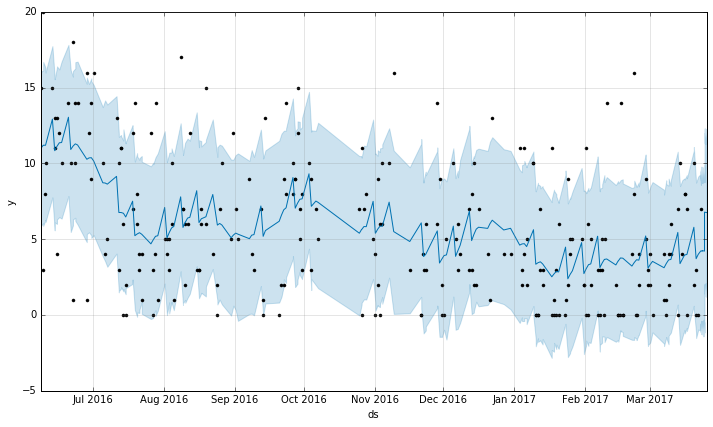

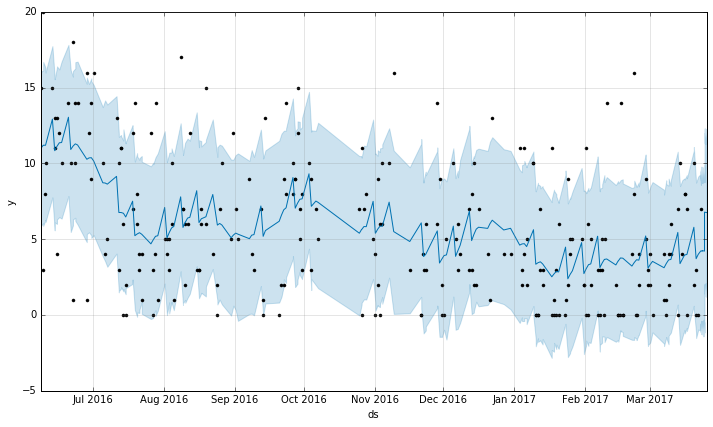

In [14]:
m.plot(forecast)

KeyError: 'the label [Sunday] is not in the [index]'

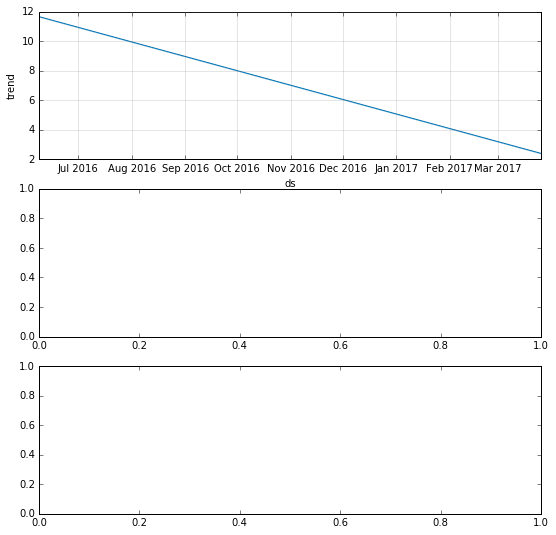

In [15]:
m.plot_components(forecast)